In [1]:
!pip uninstall -y inx

Found existing installation: inx 0.0.37
Uninstalling inx-0.0.37:
  Successfully uninstalled inx-0.0.37


In [1]:
!pip install --index-url https://test.pypi.org/simple/ --no-deps inx
!pip install validators
!pip install geopandas 
!pip install matplotlib

Looking in indexes: https://test.pypi.org/simple/
  Obtaining dependency information for inx from https://test-files.pythonhosted.org/packages/85/df/7b48e8cd4dab4982947ae8d22c00e6360e116a4908a146cd017a6eba7da9/inx-0.0.37-py3-none-any.whl.metadata
  Using cached https://test-files.pythonhosted.org/packages/85/df/7b48e8cd4dab4982947ae8d22c00e6360e116a4908a146cd017a6eba7da9/inx-0.0.37-py3-none-any.whl.metadata (650 bytes)
Using cached https://test-files.pythonhosted.org/packages/85/df/7b48e8cd4dab4982947ae8d22c00e6360e116a4908a146cd017a6eba7da9/inx-0.0.37-py3-none-any.whl (4.1 kB)


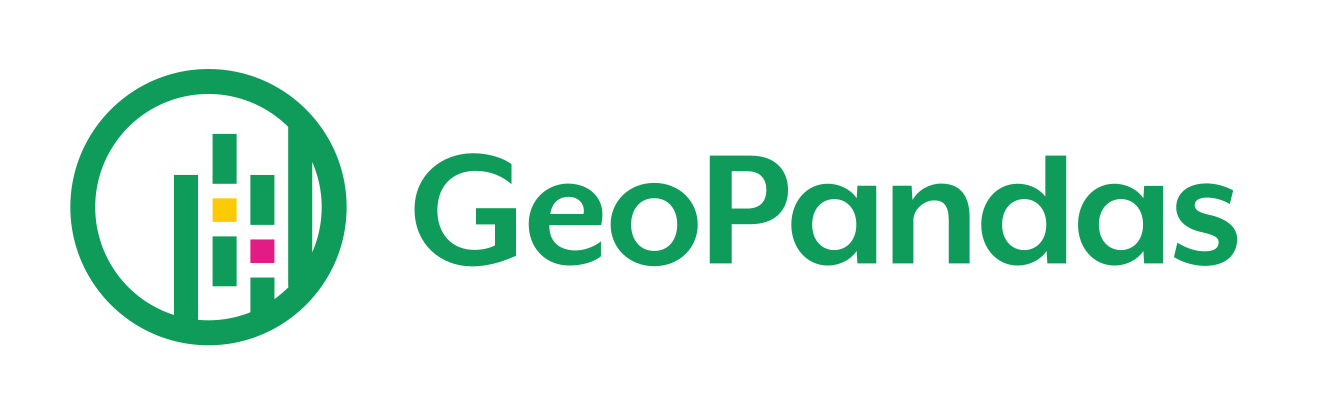

In [2]:
from IPython.display import SVG, display
import requests
input = "https://raw.githubusercontent.com/geopandas/geopandas/main/doc/source/_static/logo/geopandas_logo.svg"
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}
r = requests.get(input, allow_redirects=True, headers=headers)
path_to_file = "logo.svg"
open(path_to_file, 'wb').write(r.content)

display(SVG(filename = path_to_file))

<Axes: >

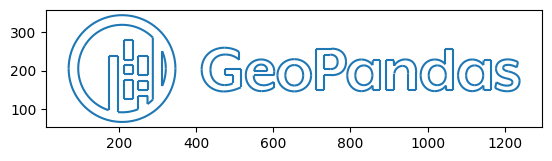

In [3]:
# SVG -> SHAPES
from inx import extension
import geopandas as gpd

logo = extension.run(input = "https://raw.githubusercontent.com/JacekPardyak/inkscape.py/master/data/geopandas_logo.svg",
              extension = "dxf_outlines.py",
              options = "",
              ext = ".dxf")
logo = gpd.read_file(logo)
logo.plot()

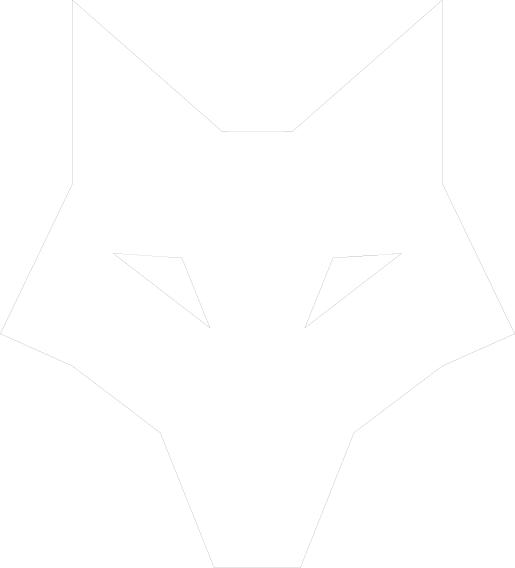

In [6]:
# DXF -> SVG
logo = extension.run(input = "https://coyotex.de/wp-content/uploads/2019/12/Wappentier_gross.dxf",
              extension = "dxf_input.py",
              options = "",
              ext = ".svg")
logo = actions.run(input = logo,
            actions = "file-open;select-all;transform-scale:.1;page-fit-to-selection;",
            ext = ".svg")
display(SVG(filename = logo))

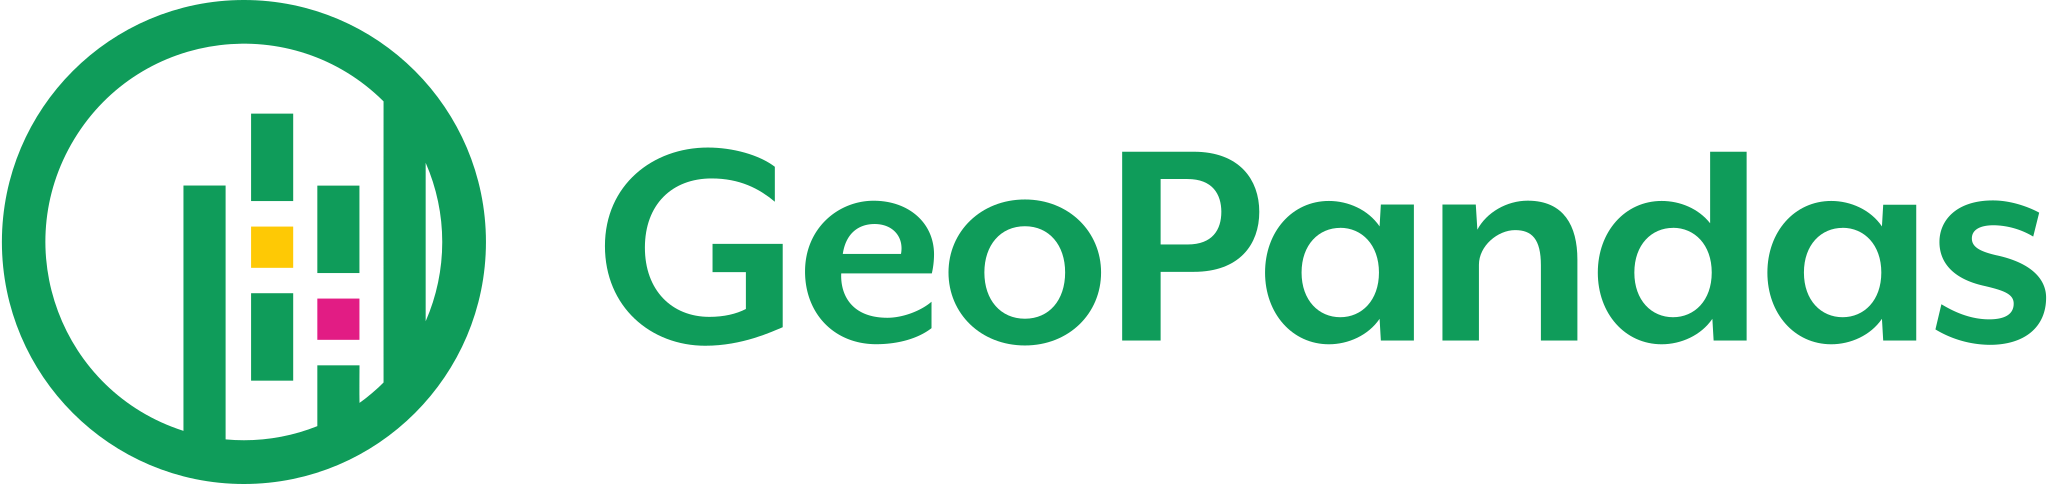

In [7]:
from inx import actions
path_to_file = actions.run(input = "https://raw.githubusercontent.com/JacekPardyak/inkscape.py/master/data/geopandas_logo.svg",
            actions = "file-open;select-all;transform-scale:10;page-fit-to-selection;",
            ext = ".svg")
display(SVG(filename = path_to_file))

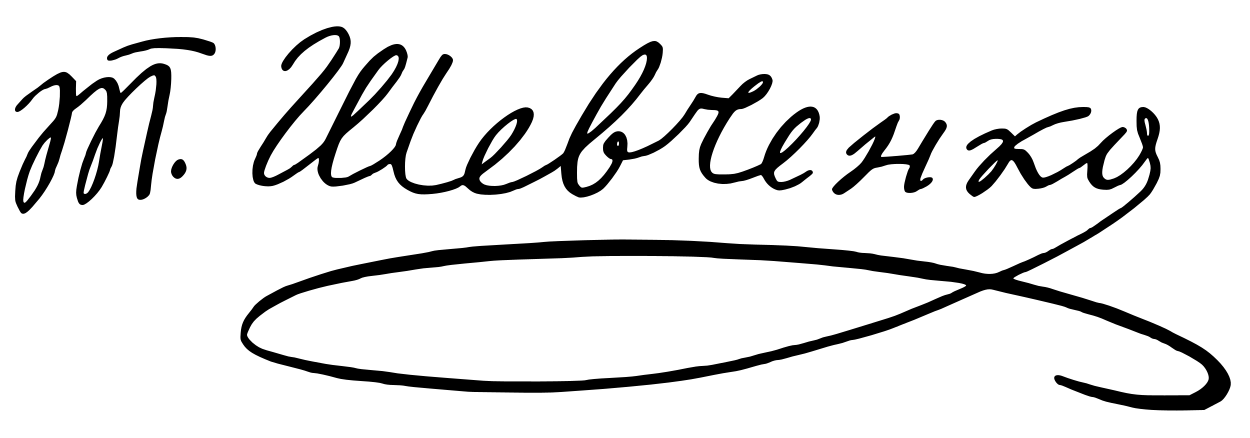

In [8]:
# signature
input = "https://upload.wikimedia.org/wikipedia/commons/0/0a/Taras_Shevchenko%E2%80%99s_signature.svg"
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}

r = requests.get(input, allow_redirects=True, headers=headers)
path_to_file = "sample.svg"
open(path_to_file, 'wb').write(r.content)

display(SVG(filename = path_to_file))


<Axes: >

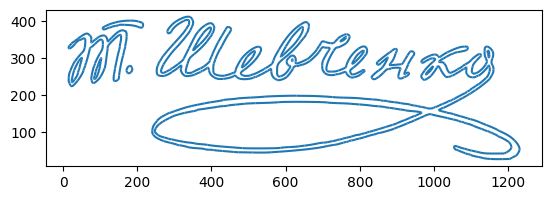

In [9]:
logo = extension.run(input = path_to_file,
                     extension = "dxf_outlines.py",
                     options = "", ext = ".dxf")
logo = gpd.read_file(logo)
logo.plot()

,colour,geometry
0,#000000,"POLYGON ((1152.000 28.056, 1151.226 28.106, 11..."
1,#000000,"POLYGON ((21.384 224.765, 21.322 224.812, 21.2..."
2,#000000,"POLYGON ((578.638 240.668, 578.533 240.700, 57..."
3,#000000,"POLYGON ((834.000 245.000, 833.894 245.108, 83..."
4,#000000,"POLYGON ((173.174 261.314, 173.057 261.444, 17..."


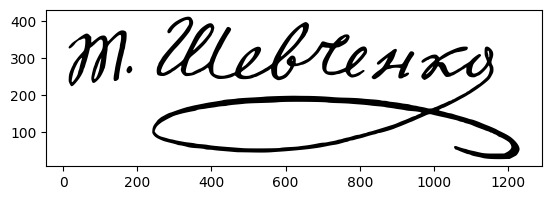

In [13]:
import shapely
import pandas as pd
import matplotlib
geoms = shapely.polygonize(logo.geometry.tolist()).geoms
rows = (x for x in {0, 4, 7, 14, 15} ) # exclude some polygons

gdf = gpd.GeoDataFrame()
for row in rows:
  tmp = gpd.GeoDataFrame(pd.DataFrame({"colour" : ["#000000"]}) , geometry = [geoms[row]]) # define shapes and colour them
  gdf = pd.concat([gdf, tmp], ignore_index=True)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", gdf.colour.tolist())
gdf.plot(cmap = cmap)

gdf

In [14]:
# python logo
input = "https://s3.dualstack.us-east-2.amazonaws.com/pythondotorg-assets/media/files/python-logo-only.svg"
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}

r = requests.get(input, allow_redirects=True, headers=headers)
path_to_file = "sample.svg"
open(path_to_file, 'wb').write(r.content)

display(SVG(filename = path_to_file))

<Axes: >

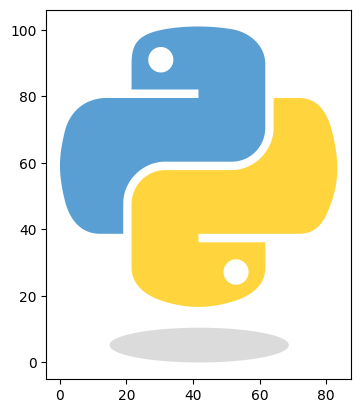

In [15]:
logo = extension.run(input = path_to_file,
                     extension = "dxf_outlines.py",
                     options = "", ext = ".dxf")
logo = gpd.read_file(logo)
geoms = shapely.polygonize(logo.geometry.tolist()).geoms
gdf = gpd.GeoDataFrame()
for row in {0, 2, 4}:
  tmp = gpd.GeoDataFrame(pd.DataFrame({"colour" : ["#000000"]}) , geometry = [geoms[row]]) # define shapes and colour them
  gdf = pd.concat([gdf, tmp], ignore_index=True)
gdf.colour = ["#5a9fd4ff", "#ffd43bff", "#b8b8b87f"]  
gdf

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", gdf.colour.tolist())
gdf.plot(cmap = cmap)

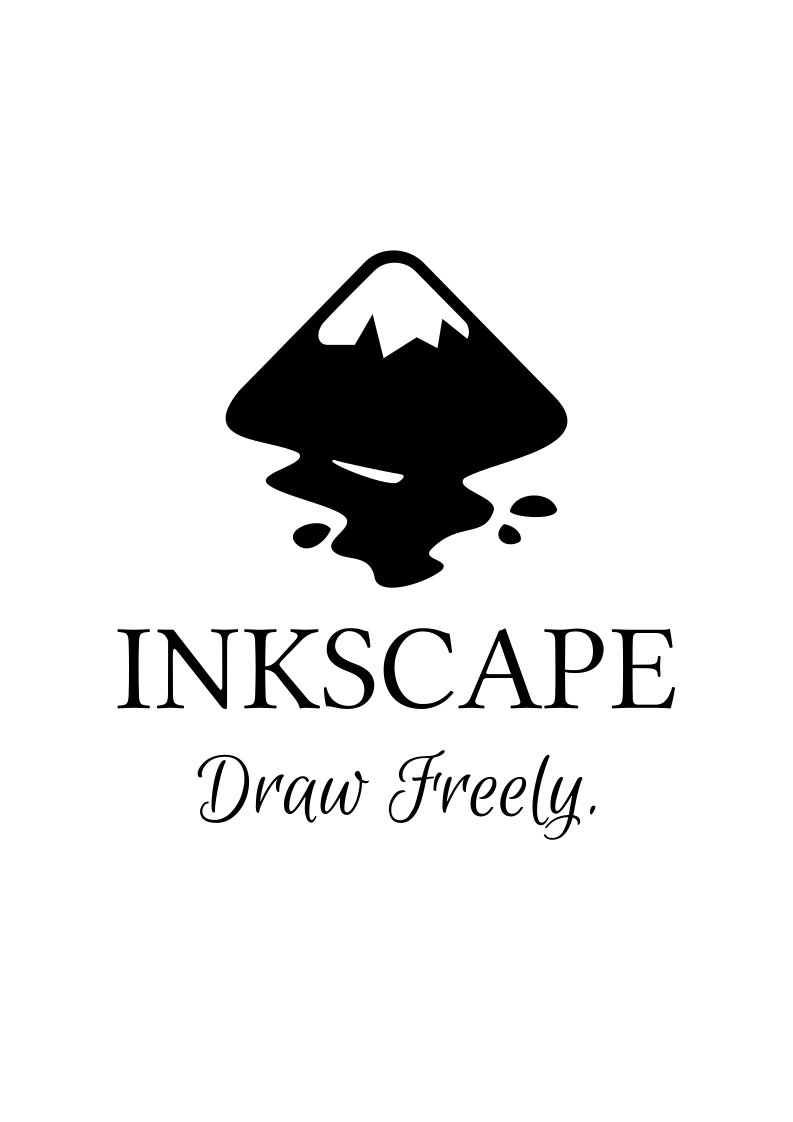

In [16]:
# Inkscape logo
input = "https://media.inkscape.org/media/resources/file/inkscape-flat-logo-2color-text.svg"
headers = {'User-Agent': 'CoolBot/0.0 (https://example.org/coolbot/; coolbot@example.org)'}

r = requests.get(input, allow_redirects=True, headers=headers)
path_to_file = "sample.svg"
open(path_to_file, 'wb').write(r.content)

display(SVG(filename = path_to_file))

<Axes: >

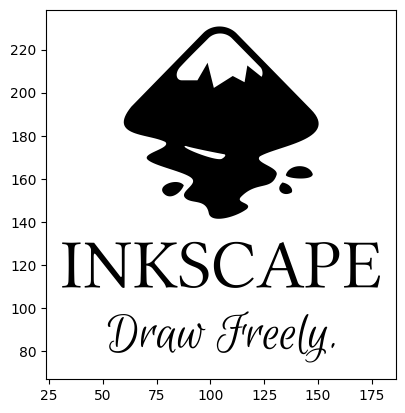

In [51]:
logo = extension.run(input = path_to_file,
                     extension = "dxf_outlines.py",
                     options = "", ext = ".dxf")
logo = gpd.read_file(logo)
geoms = shapely.polygonize(logo.geometry.tolist()).geoms
gdf = gpd.GeoDataFrame()
rows = (x for x in range(len(geoms)) if x not in {18, 21, 27, 28} ) # exclude some polygons
for row in rows:
  tmp = gpd.GeoDataFrame(pd.DataFrame({"colour" : ["#000000"]}) , geometry = [geoms[row]]) # define shapes and colour them
  gdf = pd.concat([gdf, tmp], ignore_index=True)

gdf

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", gdf.colour.tolist())
gdf.plot(cmap = cmap)